In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.display import display, Math, Latex

In [3]:
# A

# Найдём N, то сколько членов ряда нам нужно читать 

display(Math(r'|R_n| \leq \sum_{x = N + 1}^{\infty} |\frac{1}{x^2 - x - z}|' + 
             r'\leq \int_{N}^{\infty} \frac{dx}{x(x - 2)}' + r'= \frac{1}{2}\ln(\frac{N}{N-2}) \leq \epsilon' ))

<IPython.core.display.Math object>

In [4]:
# Решение последнего неревенста при условии, что N > 0 
display(Math(r'1000001.00000563 \leq x < \infty'))

<IPython.core.display.Math object>

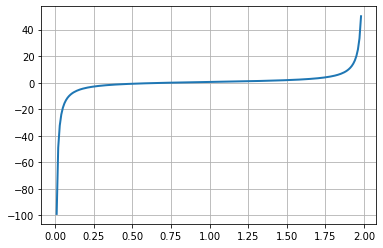

In [5]:
# Выберем минимальное N
N_a = 1000002 # 1000002

X_step = 0.01 
X_len = 2.0 - X_step

X = np.arange(X_step, X_len, X_step)

def w_A(N:int):
    Y1 = []
    for x in X:
        elem: float = 0.0
        for k in range(1, N + 1):
            elem += 1 / (k * (k - 1) - x)
        Y1.append(elem) 
    return Y1

Y1 = w_A(N_a) # slow

plt.plot(X, Y1, linewidth=2, label=r'A - simple summing')
plt.grid()
plt.show()

In [6]:
# B

# модельный ряд:

display(Math(r'\sum_{x = 1}^{\infty} \frac{1}{x(x + 1)} = 1'))

<IPython.core.display.Math object>

In [7]:
display(Math(r'\sum_{x = 1}^{\infty} \frac{1}{x^2 - x - z} = ' + 
             r'1 + \sum_{x = 1}^{\infty} (\frac{1}{x^2 - x - z} - \frac{1}{x(x + 1)}) = ' +
             r'1 + \sum_{x = 1}^{\infty} \frac{2x + z}{x(x + 1)(x^2 - x - z)}'))

<IPython.core.display.Math object>

In [8]:
# Оценим скорость сходимости

display(Math(r'|R_n| \leq \sum_{x = N + 1}^{\infty} |\frac{2x + z}{x(x + 1)(x^2 - x - z)}|' + 
             r'\leq \int_{N}^{\infty} \frac{2x + 2}{x(x + 1)(x^2 - 3x)}' +
             r'= \int_{N}^{\infty} \frac{2}{x^2(x - 3)}' +
             r'= -\frac{2(N \ln(\frac{N - 3}{N}) + 3)}{9N}' +
             r' \leq \epsilon' ))


<IPython.core.display.Math object>

In [9]:
# здесь я подзакопался в счёте этого неравенства, поэтому решил сделать проще, ведь N > 10 и натуральное:

def calc():
    n = 10
    eps = 10**(-6)
    while (2 * (n * np.log((n - 3)/n) + 3)) / (-9 * n) > eps:
        n += 1
    return n

N_b:int = calc()
print(f'N = {N_b}')

N = 1002


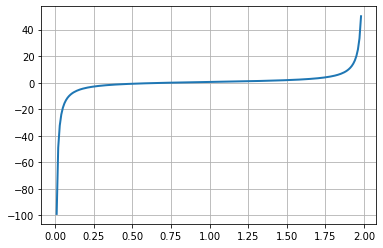

In [10]:
def w_B(N: int):
    Y2 = []
    S = 1
    
    for x in X:
        elem: float = 0.0
        for k in range(1, N + 1):
            elem += (2*k + x) / ((k * (k - 1) - x) * k * (k + 1))
        Y2.append(elem + S)
    return Y2

Y2 = w_B(N_b)
plt.plot(X, Y2, linewidth=2, label=r'B - smart summing')
plt.grid()
plt.show()

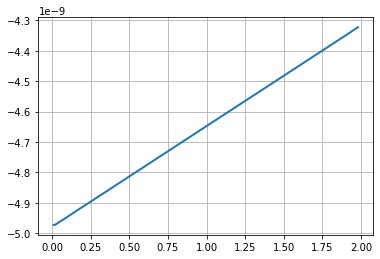

In [11]:
# С
Y3 = []

for i in range(len(Y1)):
    Y3.append(Y1[i] - Y2[i])



plt.plot(X, Y3, linewidth=2, label=r'C')
plt.grid()
plt.show()